<a href="https://colab.research.google.com/github/vedantbahel/Deep-Learning/blob/master/Basic/00_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Made some changes here but was not clear about it so worked on some other code.

In [1]:
#importing lib
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
import matplotlib.pyplot as plt

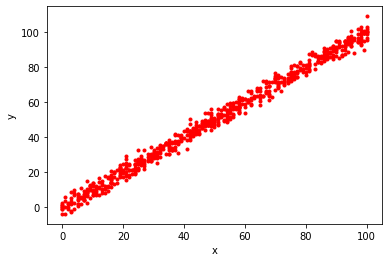

In [2]:
#creating array of x and y such that y=(x/2) - 4
train = pd.read_csv('"Linear Regression - Sheet1.csv"')
dataset = list(zip(train.x, train.y))

# xs = np.array([0.0,  2.0, 4.0, 6.0, 8.0, 10.0], dtype=float)
# ys = np.array([-4.0, -3.0, -2.0, -1.0, 0.0, 1.0], dtype=float)

#displaying data
for i in dataset: plt.plot(i[0], i[1], 'r.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
#defining a single layer; single neuron model
model = tf.keras.Sequential([keras.layers.Dense(units=3, activation='relu', input_shape=[1])])
model.add(Dense(1))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [6]:
#defining the model evaluation for backpropogation
model.compile(optimizer='sgd', loss='mean_squared_error')

In [7]:
#taraining the model with iterations (No. of front & back propogation)
run_model = model.fit(train.x, train.y, epochs=700)

Epoch 1/700
22/22 [==============================] - 0s 2ms/step - loss: 3080.2939
Epoch 2/700
22/22 [==============================] - 0s 2ms/step - loss: 1506.7227
Epoch 3/700
22/22 [==============================] - 0s 2ms/step - loss: 1117.8708
Epoch 4/700
22/22 [==============================] - 0s 2ms/step - loss: 957.8945
Epoch 5/700
22/22 [==============================] - 0s 2ms/step - loss: 890.9136
Epoch 6/700
22/22 [==============================] - 0s 2ms/step - loss: 864.5630
Epoch 7/700
22/22 [==============================] - 0s 2ms/step - loss: 853.2851
Epoch 8/700
22/22 [==============================] - 0s 2ms/step - loss: 849.0081
Epoch 9/700
22/22 [==============================] - 0s 2ms/step - loss: 847.1858
Epoch 10/700
22/22 [==============================] - 0s 2ms/step - loss: 846.7576
Epoch 11/700
22/22 [==============================] - 0s 2ms/step - loss: 846.1032
Epoch 12/700
22/22 [==============================] - 0s 2ms/step - loss: 846.0139
Epoch 13/7

In [8]:
print(model.predict([40.0]))
#Output is 15.25 for epochs 500 and 15.99 for epochs 700 
#actual output should have been 16
#but nothing is 100% efficient xD
#also we can reach 100% aaccuracy on a small data set but in real life scenarios we rarely get 100% accuracy.

1/1 [==============================] - 0s 102ms/step
[[49.881443]]


In [9]:
# list all data in history
print(run_model.history.keys())

dict_keys(['loss'])


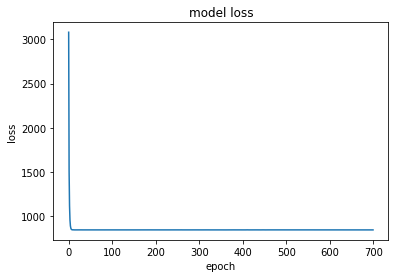

In [10]:
# summarize history for accuracy
plt.plot(run_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
